# Resultados do Vestibulinho ETEC para Desenvolvimento de Sistemas em São José do Rio Preto

In [2]:
#Importações
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importando os resultados:
df_resultado = pd.read_csv('Resultado_etec.csv.csv')
df_resultado

,Class.,Nº Inscrição,Nome,Nota,Afrodesc.,Esc. Pública,Situação
0,1,0098.00S.01309-2,GABRIEL SILVA BERNARDES OLIVEIRA,44,NÃO,SIM,Classificado
1,2,0098.00S.01315-8,PEDRO RUAN MADURO DA SILVA,"41,8",NÃO,SIM,Classificado
2,3,0098.00S.02707-8,ARTHUR ROCHA GRIGORIO DA SILVA,"38,5",NÃO,SIM,Classificado
3,4,0098.00S.00113-2,DAVI BERALDI DOS SANTOS,"38,5",NÃO,SIM,Classificado
4,5,0098.00S.02721-2,CARLOS HENRIQUE ALVES DA SILVA,"38,5",NÃO,SIM,Classificado
...,...,...,...,...,...,...,...
505,Desc.,0098.00S.00638-5,THIAGO FIORONI DIAS,AUSENTE,NÃO,NÃO,Ausente
506,Desc.,0098.00S.02958-0,VALERIA DA SILVA LEITE AUGUSTO,AUSENTE,NÃO,NÃO,Ausente
507,Desc.,0098.00S.01524-6,VICTOR HENRIQUE GUARNIERI,AUSENTE,NÃO,NÃO,Ausente
508,Desc.,0098.00S.02470-3,VICTOR HUGO GONCALVES PHILLIPS,AUSENTE,SIM,SIM,Ausente


In [6]:
df_resultado_sem_ausente=df_resultado.loc[df_resultado['Nota']!='AUSENTE']
df_resultado_sem_ausente['NOTA'] = df_resultado_sem_ausente['Nota'].map(
    lambda x: float(x.replace(',', '.')))
df_resultado_sem_ausente


C:\Users\miria\AppData\Local\Temp\ipykernel_21244\1575313911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultado_sem_ausente['NOTA'] = df_resultado_sem_ausente['Nota'].map(


,Class.,Nº Inscrição,Nome,Nota,Afrodesc.,Esc. Pública,Situação,NOTA
0,1,0098.00S.01309-2,GABRIEL SILVA BERNARDES OLIVEIRA,44,NÃO,SIM,Classificado,44.0
1,2,0098.00S.01315-8,PEDRO RUAN MADURO DA SILVA,"41,8",NÃO,SIM,Classificado,41.8
2,3,0098.00S.02707-8,ARTHUR ROCHA GRIGORIO DA SILVA,"38,5",NÃO,SIM,Classificado,38.5
3,4,0098.00S.00113-2,DAVI BERALDI DOS SANTOS,"38,5",NÃO,SIM,Classificado,38.5
4,5,0098.00S.02721-2,CARLOS HENRIQUE ALVES DA SILVA,"38,5",NÃO,SIM,Classificado,38.5
...,...,...,...,...,...,...,...,...
450,451,0098.00S.01707-3,JULIA ISADORA NEVES ALEXANDRE,"8,8",NÃO,SIM,Classificado,8.8
451,452,0098.00S.01891-0,LAURA BRITO LOPES,"8,8",NÃO,SIM,Classificado,8.8
452,453,0098.00S.02009-6,LUIZ EDUARDO DE SOUSA JUNIOR,"8,8",NÃO,SIM,Classificado,8.8
453,454,0098.00S.02540-9,BRENNO HENRIQUE RODRIGUES,8,NÃO,NÃO,Classificado,8.0


C:\Users\miria\AppData\Local\Temp\ipykernel_21244\3052259897.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45,


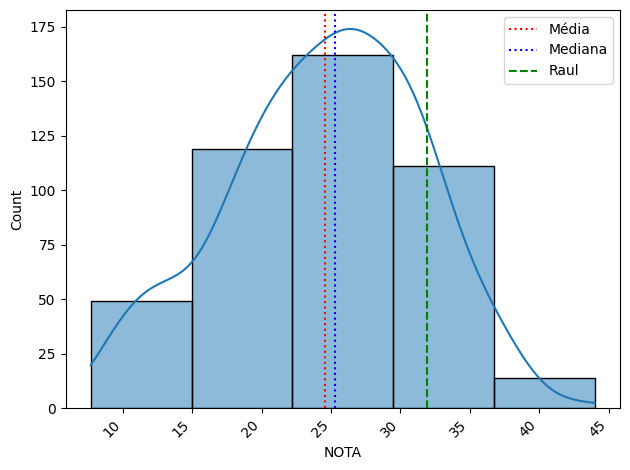

In [37]:
# Histograma da pontuação
ax = sns.histplot(data=df_resultado_sem_ausente,
                  x='NOTA', kde=True, bins=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
media = df_resultado_sem_ausente.NOTA.mean()
mediana = df_resultado_sem_ausente.NOTA.median()
nota_raul = 31.9

ax.axvline(media, color='r', linestyle='dotted', label='Média')
ax.axvline(mediana, color='b', linestyle='dotted', label='Mediana')
ax.axvline(nota_raul, color='g', linestyle='--', label='Raul')

ax.legend()


plt.tight_layout()

plt.show()


In [38]:
df_resultado_escola_publica = df_resultado_sem_ausente.loc[
    df_resultado_sem_ausente['Esc. Pública'] == 'SIM']

df_resultado_escola_privada = df_resultado_sem_ausente.loc[
    df_resultado_sem_ausente['Esc. Pública'] == 'NÃO']

df_resultado_afro = df_resultado_sem_ausente.loc[
    df_resultado_sem_ausente['Afrodesc.'] == 'SIM']

df_resultado_branco = df_resultado_sem_ausente.loc[
    df_resultado_sem_ausente['Afrodesc.'] == 'NÃO']


C:\Users\miria\AppData\Local\Temp\ipykernel_21244\1786436439.py:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(5, 45, 5)


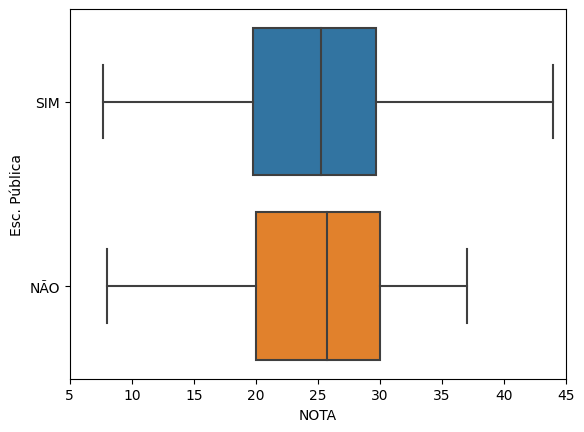

In [81]:
# Comparação boxplot Escola Pública
sns.boxplot(data=df_resultado_sem_ausente, y='Esc. Pública', x='NOTA',   order=['SIM', 'NÃO'])
plt.xlim(5, 45, 5)
plt.show()


C:\Users\miria\AppData\Local\Temp\ipykernel_21244\230418057.py:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(5, 45, 5)


(5.0, 45.0)

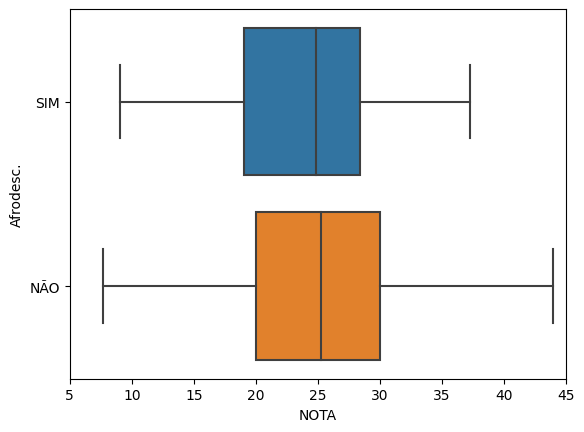

In [76]:
# Comparação boxplot Negros e Brancos
sns.boxplot(data=df_resultado_sem_ausente, y='Afrodesc.', x='NOTA', orient='h',  order=['SIM', 'NÃO'])
plt.xlim(5, 45, 5)